In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('/content/drive/MyDrive/master dissertation/out2.csv',encoding= 'unicode_escape')

In [ ]:
for col in df.columns:
    print (col)

Unnamed: 0
New Code
Children_Poverty_Rate
E1
E2
E3
E4
E5
E6
HD1
HD2
L1
L2
O
P1
P2
P3
Q


In [ ]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [4]:
usable_variables = [
'E1',
'E2',
'E3',
'E4',
'E5',
'E6',
'HD1',
'HD2',
'L1',
'L2',
'O',
'P1',
'P2',
'P3',
'Q']

In [5]:
independent_variables = pd.DataFrame(df[usable_variables]) 

In [6]:
dependent_vairable = pd.DataFrame(df['Children_Poverty_Rate']) 

In [ ]:
sm.OLS(endog=dependent_vairable, exog=sm.add_constant(independent_variables)).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Children_Poverty_Rate   R-squared:                       0.979
Model:                               OLS   Adj. R-squared:                  0.978
Method:                    Least Squares   F-statistic:                     1881.
Date:                   Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:29:34   Log-Likelihood:                -1174.7
No. Observations:                    625   AIC:                             2381.
Df Residuals:                        609   BIC:                             2452.
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5429     31.074      0.661      0.509     -40.482      81.568
E1             0.3899      0.100      3.892      0.000       0.193       0.587
E2            -0.1911      0.137     -1.397      0.163      -0.460       0.078
E3             1.2685      0.370      3.424      0.001       0.541       1.996
E4            -0.8366      0.294     -2.851      0.005      -1.413      -0.260
E5            -1.2174      0.431     -2.824      0.005      -2.064      -0.371
E6             0.0479      0.014      3.352      0.001       0.020       0.076
HD1           -0.0534      0.178     -0.301      0.764      -0.402       0.295
HD2            0.0577      0.232      0.249      0.803      -0.397       0.513
L1             0.0464      0.083      0.562      0.574      -0.116       0.209
L2            -0.0432      0.076     -0.565      0.572      -0.193       0.107
O              0.8752      0.024     36.324      0.000       0.828       0.922
P1            -0.1469      0.299     -0.491      0.623      -0.734       0.440
P2            -0.1108      0.297     -0.373      0.709      -0.694       0.473
P3            -0.0342      0.300     -0.114      0.909      -0.623       0.555
Q              0.1236      0.042      2.942      0.003       0.041       0.206
==============================================================================
Omnibus:                       61.456   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.777
Skew:                           0.074   Prob(JB):                     4.15e-82
Kurtosis:                       6.791   Cond. No.                     9.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
independent_variables.columns

Index(['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'HD1', 'HD2', 'L1', 'L2', 'O', 'P1',
       'P2', 'P3', 'Q'],
      dtype='object')

In [ ]:
independent_variables_VIF = drop_column_using_vif_(independent_variables)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Dropping: E5
Dropping: P2
Dropping: E2
Dropping: E1
Dropping: HD2
Dropping: E4
Dropping: L2
Dropping: P3
Dropping: E3


In [ ]:
independent_variables_VIF.columns

Index(['E6', 'HD1', 'L1', 'O', 'P1', 'Q'], dtype='object')

In [ ]:
model_1_VIF = sm.OLS(endog=dependent_vairable, exog=sm.add_constant(independent_variables_VIF)).fit()
model_1_VIF.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Children_Poverty_Rate   R-squared:                       0.977
Model:                               OLS   Adj. R-squared:                  0.977
Method:                    Least Squares   F-statistic:                     4396.
Date:                   Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                           23:23:16   Log-Likelihood:                -1199.7
No. Observations:                    625   AIC:                             2413.
Df Residuals:                        618   BIC:                             2445.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7731      3.563     -2.743      0.006     -16.771      -2.775
E6             0.0678      0.012      5.493      0.000       0.044       0.092
HD1            0.1930      0.062      3.127      0.002       0.072       0.314
L1             0.0529      0.041      1.296      0.196      -0.027       0.133
O              0.9555      0.013     71.262      0.000       0.929       0.982
P1             0.1759      0.020      8.853      0.000       0.137       0.215
Q              0.2166      0.018     12.095      0.000       0.181       0.252
==============================================================================
Omnibus:                       41.189   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.736
Skew:                           0.152   Prob(JB):                     8.31e-33
Kurtosis:                       5.362   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regression with Lasso

In [ ]:
split_rand_state = 1
y = dependent_vairable
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

In [ ]:
train_x = independent_variables
train_y = dependent_vairable

In [ ]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(max_iter=100000000.0, normalize=True)

In [ ]:
lasso_model.score(X=train_x, y=train_y)

0.0

In [ ]:
from sklearn.linear_model import LassoCV
import time

start_time = time.time()
lasso_cv = LassoCV(cv=20, alphas=list_alphas).fit(train_x, train_y)
fit_time = time.time() - start_time

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


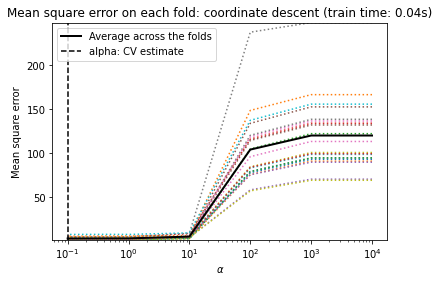

In [ ]:
import matplotlib.pyplot as plt

ymin, ymax = np.min(lasso_cv.mse_path_), np.max(lasso_cv.mse_path_)
# lasso = model[-1]
plt.semilogx(lasso_cv.alphas_, lasso_cv.mse_path_, linestyle=":")
plt.plot(
    lasso_cv.alphas_,
    lasso_cv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso_cv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

In [ ]:
print(lasso_cv.alphas_)

[1.e+04 1.e+03 1.e+02 1.e+01 1.e+00 5.e-01 1.e-01]


In [ ]:
print(lasso_cv.alpha_)

0.1


In [ ]:
# increase the max_iter to guarantee convergence
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True, alpha = lasso_cv.alpha_)
lasso_model.fit(X=train_x, y=train_y)
print(lasso_model.score(train_x, train_y))

0.9151089947970515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [ ]:
lasso_model.score(test_X, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


-2.6774273534308586

### !!! LASSO is not suitable !!!

### PCA regression

In [7]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(independent_variables)

In [8]:
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [9]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[5.41438904e-01 1.76084019e-01 1.19273470e-01 7.39836796e-02
 4.45981109e-02 1.79417418e-02 8.44771114e-03 5.32454564e-03
 4.64713906e-03 3.84785083e-03 2.32888494e-03 1.72941206e-03
 2.70895196e-04 5.55730547e-05 2.80638293e-05]


Text(0, 0.5, 'Cumulative explained variance')

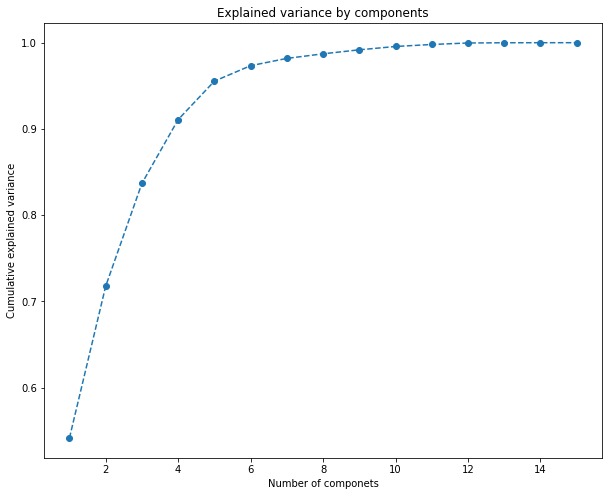

In [12]:
pca = PCA()
pca.fit(X)
plt.figure(figsize = (10,8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of componets')
plt.ylabel('Cumulative explained variance')
#plt.savefig('image/Explained variance by components.png',dpi=300)

In [10]:
print("%.2f" % pca.explained_variance_ratio_[0])

0.54


In [11]:
print("%.2f" % pca.explained_variance_ratio_[1])

0.18


In [ ]:
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[8.13459891e+00 2.64549307e+00 1.79196920e+00 1.11153365e+00
 6.70043733e-01 2.69557419e-01 1.26918737e-01 7.99961785e-02
 6.98187960e-02 5.78102589e-02 3.49892569e-02 2.59827533e-02
 4.06993985e-03 8.34931712e-04 4.21632051e-04]


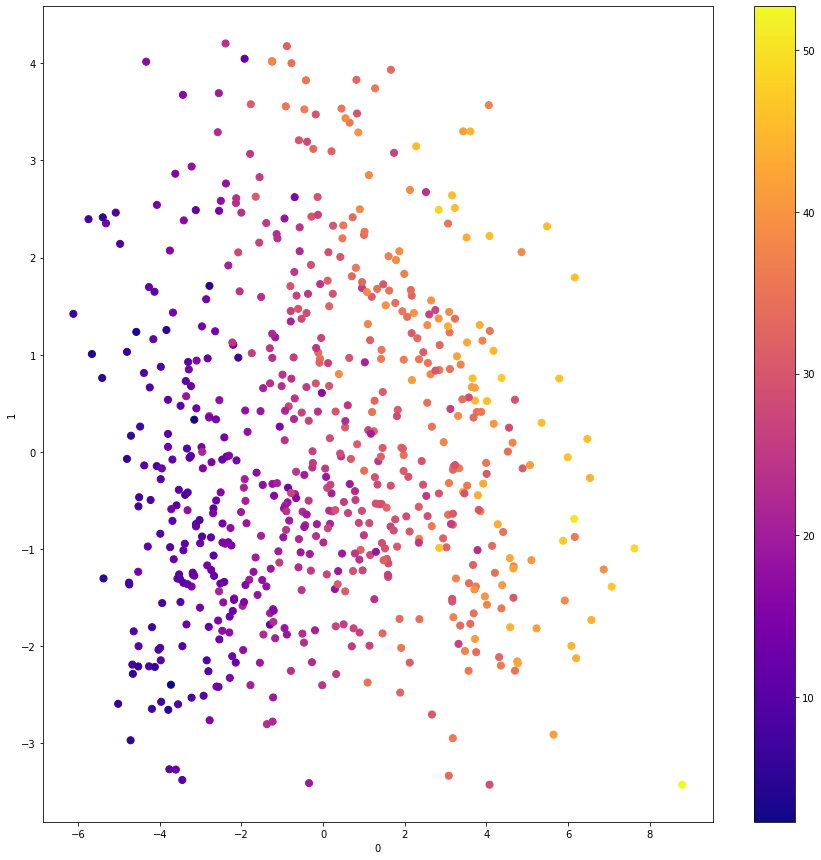

In [ ]:
fig, ax = plt.subplots()
df_X_new_coord.plot(kind="scatter", x=0, y=1, s=50, c=df['Children_Poverty_Rate'], cmap="plasma", ax=ax, figsize=(15, 15));

Text(0.5, 0, 'PC1')

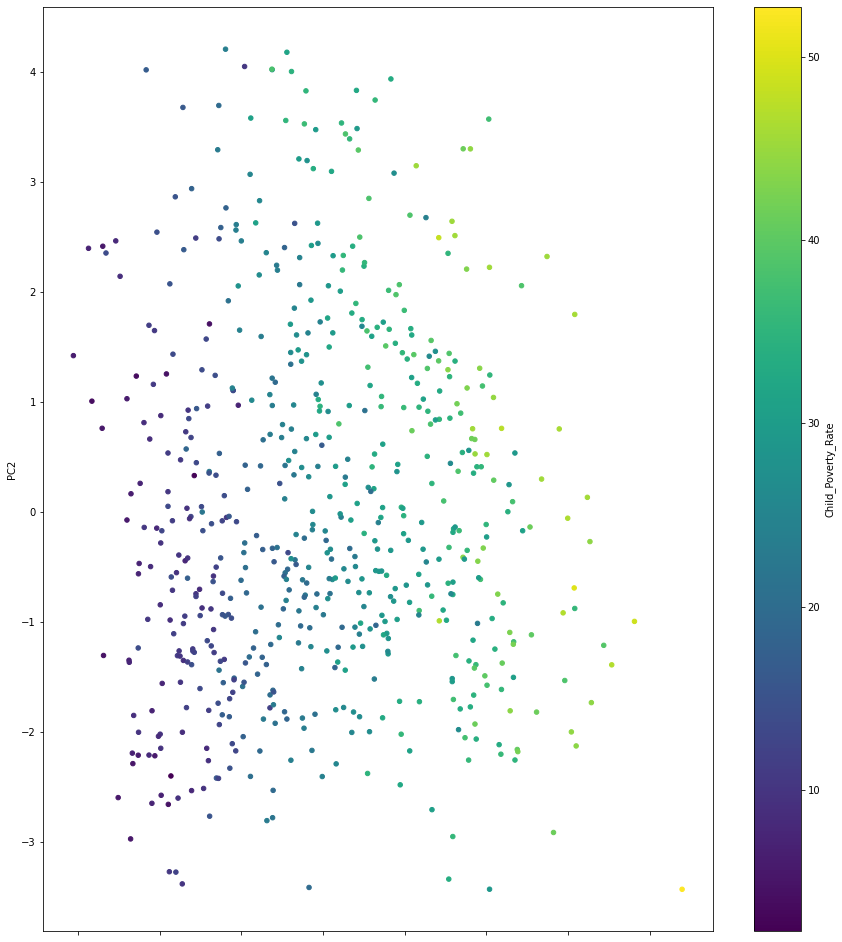

In [ ]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the MEDV variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(Child_Poverty_Rate = dependent_vairable)

ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "Child_Poverty_Rate", 
                                 colormap="viridis",figsize=(15, 17))

ax.set_ylabel("PC2")
ax.set_xlabel("PC1")

In [ ]:
df_X_new_coord

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Child_Poverty_Rate
0,-5.318824,2.352994,0.547214,-1.491239,0.782539,-1.428279,-0.917297,0.903595,0.143687,0.054172,-0.230844,-0.343844,0.080886,0.008748,0.036603,13.9
1,2.549168,0.506172,2.067030,2.643521,-0.832163,-0.187411,-0.105673,0.145009,-0.500030,0.027228,0.411991,0.211983,-0.063621,-0.055137,0.001702,34.5
2,4.366565,-1.610803,-1.399724,0.397753,-0.829321,0.693987,-0.143561,-0.119007,-0.089500,0.216025,-0.397868,-0.329214,-0.012176,-0.011649,-0.017750,35.7
3,4.206233,-1.244280,-0.601477,0.293549,-0.183031,-0.521731,0.251458,0.252459,-0.098448,0.348085,-0.102398,-0.155878,0.001160,-0.058263,-0.006915,34.3
4,3.175173,-2.946571,-0.528725,-0.642676,-0.860042,0.029961,-0.010366,-0.003894,-0.628439,0.246294,-0.133011,-0.073304,0.040179,-0.009399,0.005236,35.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,-2.224490,1.126540,0.454032,-2.630799,-1.311119,-0.564081,0.009520,0.205991,-0.426067,0.214903,0.222551,-0.257352,0.074984,0.002347,0.021061,24.5
621,-0.089862,0.918281,0.637061,-1.710406,-1.125580,0.099927,-0.182469,0.134306,0.072480,-0.042366,0.225327,0.037578,0.125310,0.069975,0.011060,32.3
622,-2.080071,2.053984,0.949744,-1.905228,-1.426115,-0.474273,-0.052431,0.210087,0.017094,-0.155973,0.176799,-0.153649,0.036053,0.004150,0.009007,27.7
623,6.148203,-0.688854,-1.060460,-1.944568,-0.752746,-0.199768,0.011217,-0.336634,0.692311,0.426819,-0.319872,-0.033653,0.026017,-0.048059,0.022805,50.2


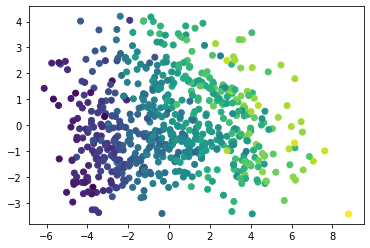

In [ ]:
plt.scatter(df_X_new_coord[0], df_X_new_coord[1], c = df.Children_Poverty_Rate, cmap="viridis")

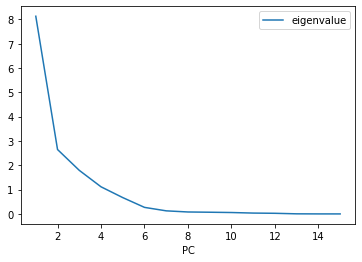

In [ ]:
df_pca = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df_pca.plot.line(x = 'PC', y = 'eigenvalue')

One observation is that PC=2 is a transition point, as the plot decreases very quickly before this point and then becomes very flat after it. Therefore, two components should be chosen.

Step 1: split the data into training and testing set.

In [ ]:
from sklearn.model_selection import train_test_split
split_rand_state = 1
y = dependent_vairable
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=split_rand_state)

#### Step 2: build a linear regression model using the training data

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=train_X, y=train_y)

LinearRegression()

#### Step 3: measure model performance using the testing data

We use R2 as the performance metric for linear regression.

In [ ]:
lr.score(X=test_X, y=test_y)

0.9686872294871396

### PCA regression

In [ ]:
# create a new X dataset including three PCs
X_three_pc = X_new_components[:,[0,1,2]]

In [ ]:
# split the traing and testing dataset
split_rand_state = 1
train_X_pc, test_X_pc, train_y_pc, test_y_pc = train_test_split(X_three_pc, y, random_state=split_rand_state)

In [ ]:
# train a new model
lr_pc = LinearRegression()
lr_pc.fit(X=train_X_pc, y=train_y_pc)

LinearRegression()

In [ ]:
# measure the model performance
lr_pc.score(X=test_X_pc, y=test_y_pc)

0.8665745533312839

## Kernel PCA

![](https://d3i71xaburhd42.cloudfront.net/3a92a26a66efba1849fa95c900114b9d129467ac/3-TableI-1.png)

[Image Credit](https://d3i71xaburhd42.cloudfront.net/3a92a26a66efba1849fa95c900114b9d129467ac/3-TableI-1.png)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X) 

In [ ]:
# different kernels can be used
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.05, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.05, coef0=1, fit_inverse_transform=True)

<Figure size 792x288 with 0 Axes>

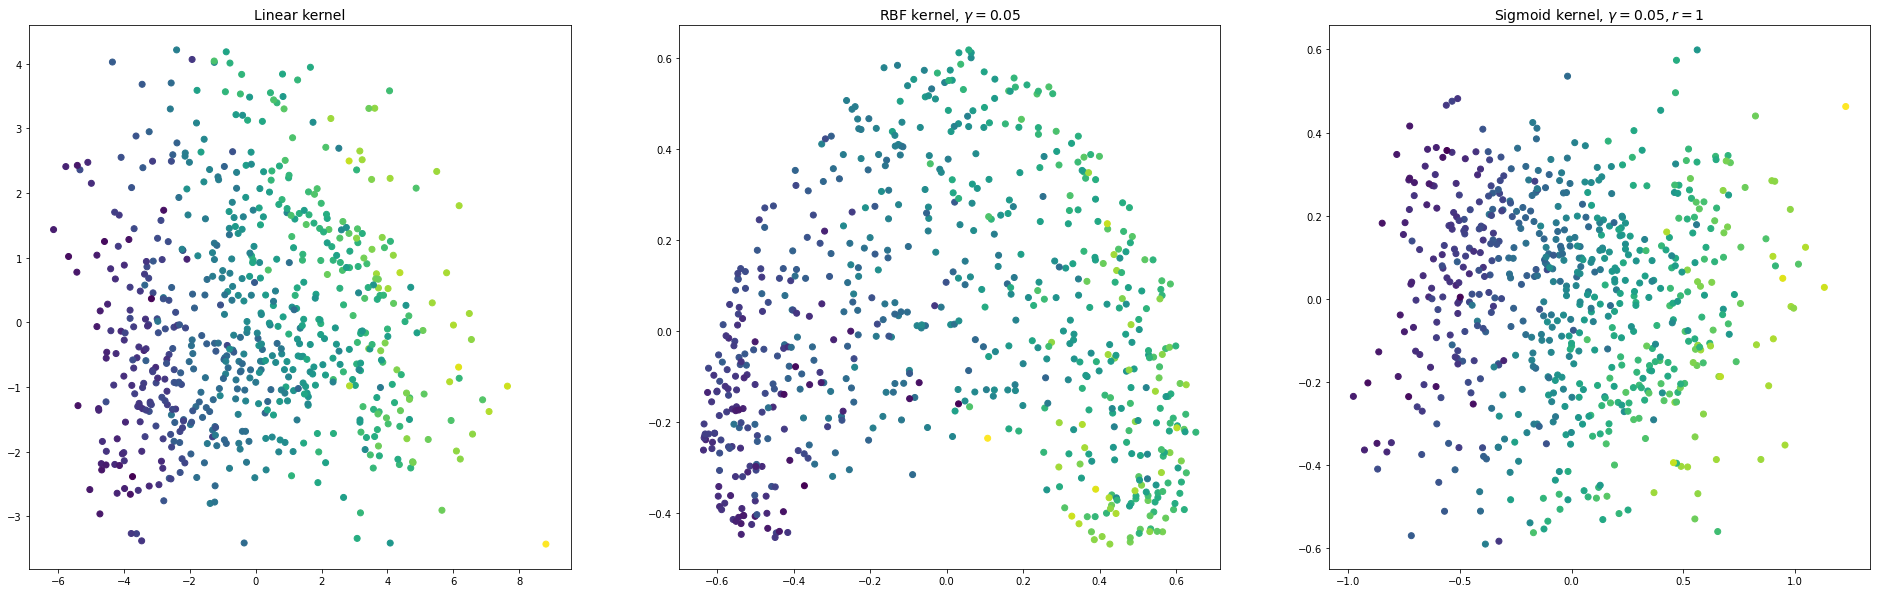

In [ ]:
 #loop over methods and plot the projection of the Swiss roll
plt.figure(figsize=(11, 4))
plt.figure(figsize=(33, 10))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), 
                            (132, rbf_pca, "RBF kernel, $\gamma=0.05$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=0.05, r=1$")):
    X_reduced = pca.fit_transform(X)
    
    plt.subplot(subplot), plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = df.Children_Poverty_Rate, cmap="viridis")

## optimal kernal PCA

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# create a new y variable: 1 indicates above median price and 0 indicates otherwise
new_y = df.Children_Poverty_Rate > np.mean(df.Children_Poverty_Rate)

# a pipeline is a way of concatenating many analysis steps. Will introduce the Pipeline in later workshops.
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

# two hyperparamters will be tuned: kernel type, and the gamma of the kernel
param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.1, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, new_y)
print(grid_search.best_params_)

{'kpca__gamma': 0.05333333333333333, 'kpca__kernel': 'sigmoid'}


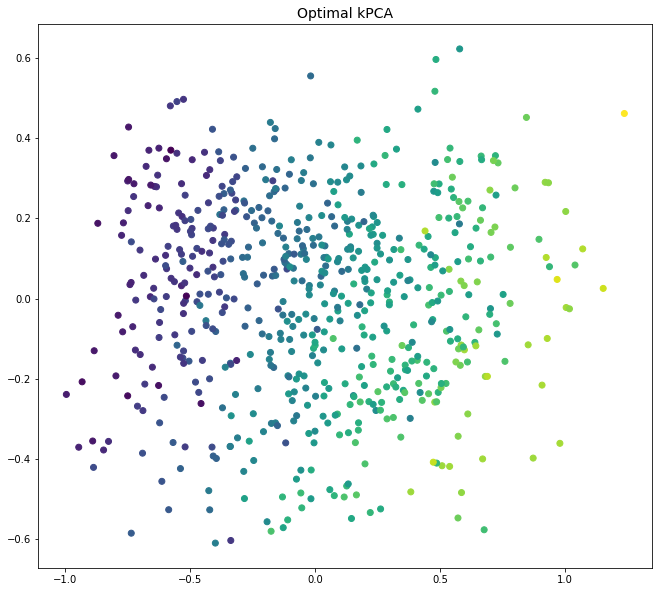

In [ ]:
k_pca_opt = KernelPCA(n_components = 2, kernel=grid_search.best_params_['kpca__kernel'], 
                      gamma=grid_search.best_params_['kpca__gamma'], fit_inverse_transform=True)

plt.figure(figsize=(11, 10))
X_reduced = k_pca_opt.fit_transform(X)  
plt.title('Optimal kPCA', fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = df.Children_Poverty_Rate, cmap="viridis", s= 50)

In [ ]:
X_reduced_1 = pd.DataFrame(X_reduced)

In [ ]:
X_reduced_1

,0,1
0,-0.887508,-0.420361
1,0.373574,-0.121926
2,0.670073,0.226516
3,0.643951,0.175766
4,0.479293,0.516895
...,...,...
620,-0.360165,-0.170781
621,-0.000646,-0.108656
622,-0.336299,-0.291764
623,0.968746,0.047984


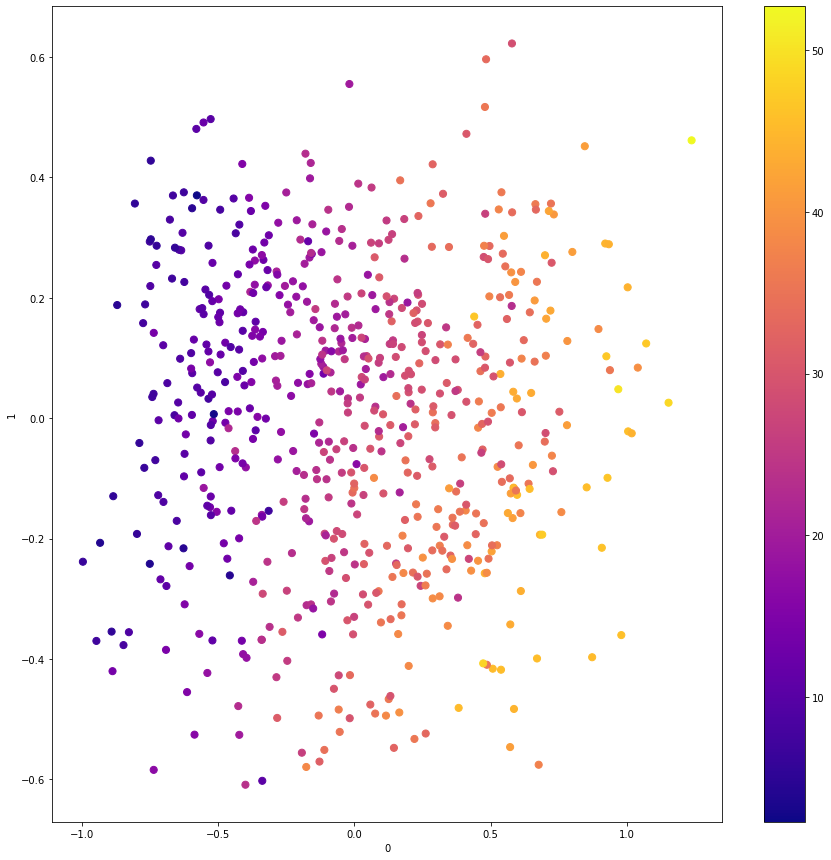

In [ ]:
fig, ax = plt.subplots()
X_reduced_1.plot(kind="scatter", x=0, y=1, s=50, c=df['Children_Poverty_Rate'], cmap="plasma", ax=ax, figsize=(15, 15));

In [ ]:
X_reduced

array([[-0.8677067 , -0.4096662 ],
       [ 0.36102122, -0.11953899],
       [ 0.64830377,  0.21832832],
       ...,
       [ 0.03788257, -0.00745802],
       [-0.03655272,  0.2545804 ],
       [-0.02298828,  0.25556102]])

In [ ]:
# split the traing and testing dataset
split_rand_state = 1
train_X_OKPCA, test_X_OKPCA, train_y_OKPCA, test_y_OKPCA = train_test_split(X_reduced, y, random_state=split_rand_state)

In [ ]:
lr_OKPCA = LinearRegression()
lr_OKPCA.fit(X=train_X_OKPCA, y=train_y_OKPCA)

LinearRegression()

In [ ]:
# measure the model performance
lr_OKPCA.score(X=train_X_OKPCA, y=train_y_OKPCA)

0.8752736995179594

In [ ]:
# measure the model performance
lr_OKPCA.score(X=test_X_OKPCA, y=test_y_OKPCA)

0.8536715215399986

## LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from time import time

In [ ]:
# one example of LLE
random_state_lle = 1000
lle = LocallyLinearEmbedding(
    n_neighbors=100, #k nearest neighbours 
    n_components=2, #dimension of final space 
    random_state=random_state_lle)

X_reduced_lle = lle.fit_transform(X)

In [ ]:
X_reduced_lle

array([[-0.06333949, -0.05975176],
       [ 0.04587916, -0.02605475],
       [ 0.05297003,  0.05584996],
       ...,
       [-0.0168316 , -0.05650746],
       [ 0.07485862,  0.04640784],
       [-0.01705954, -0.07713837]])

In [ ]:
# split the traing and testing dataset
split_rand_state = 1
train_X_LLE, test_X_LLE, train_y_LLE, test_y_LLE = train_test_split(X_reduced_lle, y, random_state=split_rand_state)

In [ ]:
lr_LLE = LinearRegression()
lr_LLE.fit(X=train_X_LLE, y=train_y_LLE)

LinearRegression()

In [ ]:
# measure the model performance
lr_LLE.score(X=train_X_LLE, y=train_y_LLE)

0.8686990713093234

In [ ]:
# measure the model performance
lr_LLE.score(X=test_X_LLE, y=test_y_LLE)

0.8299484568665435

neighbours=5 in 0.16 sec
neighbours=10 in 0.29 sec
neighbours=20 in 0.35 sec
neighbours=50 in 0.41 sec
neighbours=80 in 0.92 sec
neighbours=100 in 1.2 sec


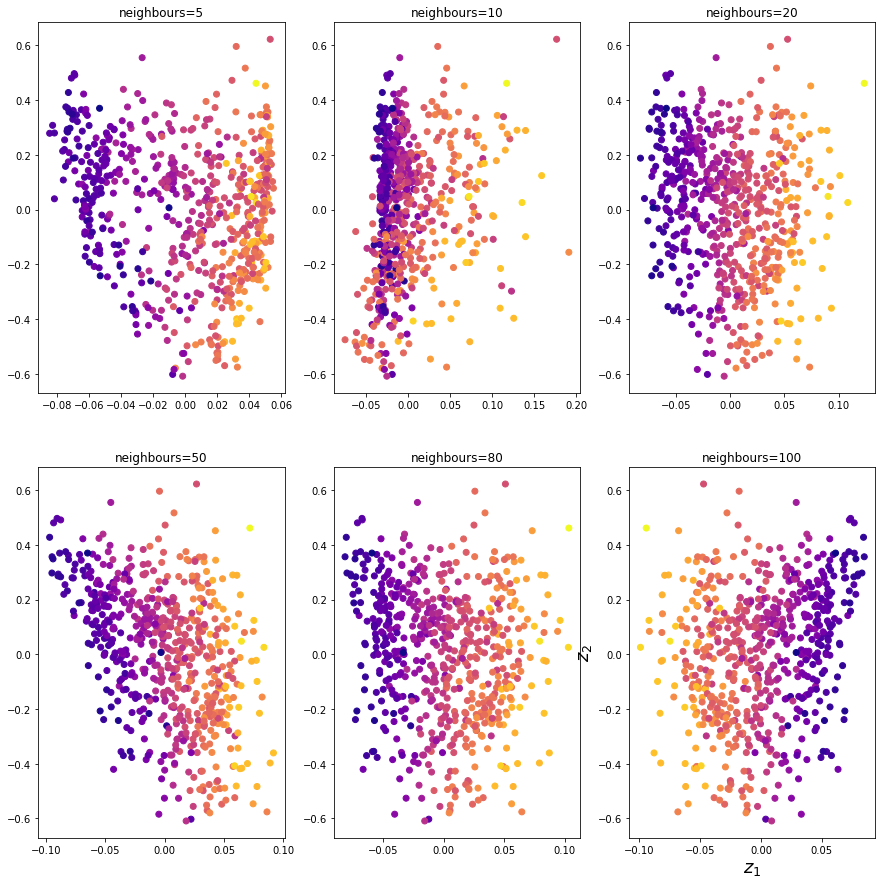

In [ ]:
# run and compare a range of LLE with different n_neighbors
n_components = 2
(fig, subplots) = plt.subplots(2, 3, figsize=(15, 15), squeeze=False)
n_neighbors = [5, 10, 20, 50, 80, 100]
plt.axis('tight')
subplots = subplots.flatten()

random_state_lle = 1024 

for i, nneighor in enumerate(n_neighbors):
    ax = subplots[i]

    t0 = time()
    lle = LocallyLinearEmbedding(
        n_neighbors=nneighor, #k nearest neighbours 
        n_components=n_components, #dimension of final space 
        random_state=random_state_lle)
    X_reduced_lle = lle.fit_transform(X)
    t1 = time()
    print("neighbours=%d in %.2g sec" % (nneighor, t1 - t0))
    ax.set_title("neighbours=%d" % nneighor)
    ax.scatter(x=X_reduced_lle[:, 0], y=X_reduced[:, 1], c = df['Children_Poverty_Rate'], cmap="plasma")
    plt.xlabel("$z_1$", fontsize=18)
    plt.ylabel("$z_2$", fontsize=18)
    ax.axis('tight')